This file is to just examine the data in the "data" folder, 
to see what data would be interesting to include in the final project.

In [1]:
# importing packages and data files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

loc_pull_data = "../data/WRI363_Pulls_Data.csv"
loc_card_data = "../data/WRI363_Oracle_Data.csv"

pull_data = pd.read_csv(loc_pull_data)
card_data = pd.read_csv(loc_card_data)


<Axes: xlabel='Reversed'>

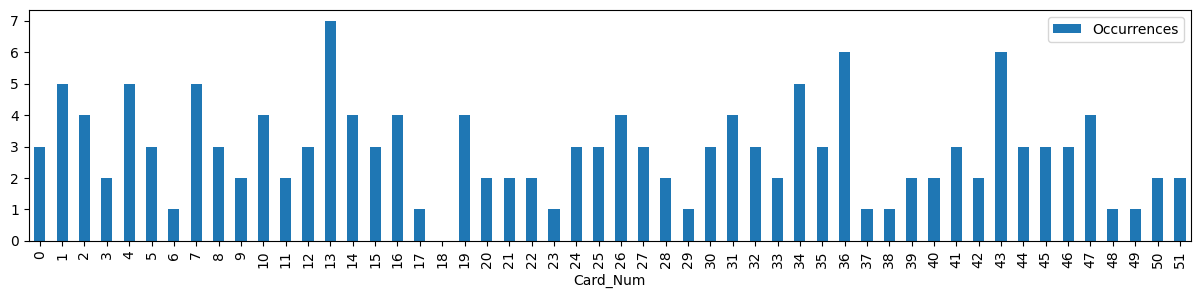

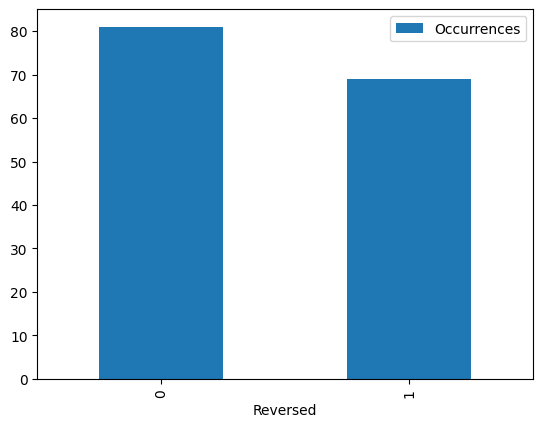

In [2]:
# graphing how often I pulled cards

card_occurrences = np.bincount(pull_data["Card_Num"])
card_data = np.column_stack((card_data, card_occurrences))

card_data = pd.DataFrame({'Card_Num': card_data[:, 0], 'Card_Theme': card_data[:, 1], 'Occurrences': card_data[:,4]})

card_data.plot.bar("Card_Num", "Occurrences", figsize=(15,3))

reversed_occurrences = np.bincount(pull_data["Reversed"])
reversed_op = np.array([0,1])
reversed_occurrences = np.column_stack((reversed_op, reversed_occurrences))
reversed_occurrences = pd.DataFrame({'Reversed': reversed_occurrences[:, 0], 'Occurrences': reversed_occurrences[:,1]})
reversed_occurrences.plot.bar("Reversed", "Occurrences")


<Axes: xlabel='Date', ylabel='Card_Num'>

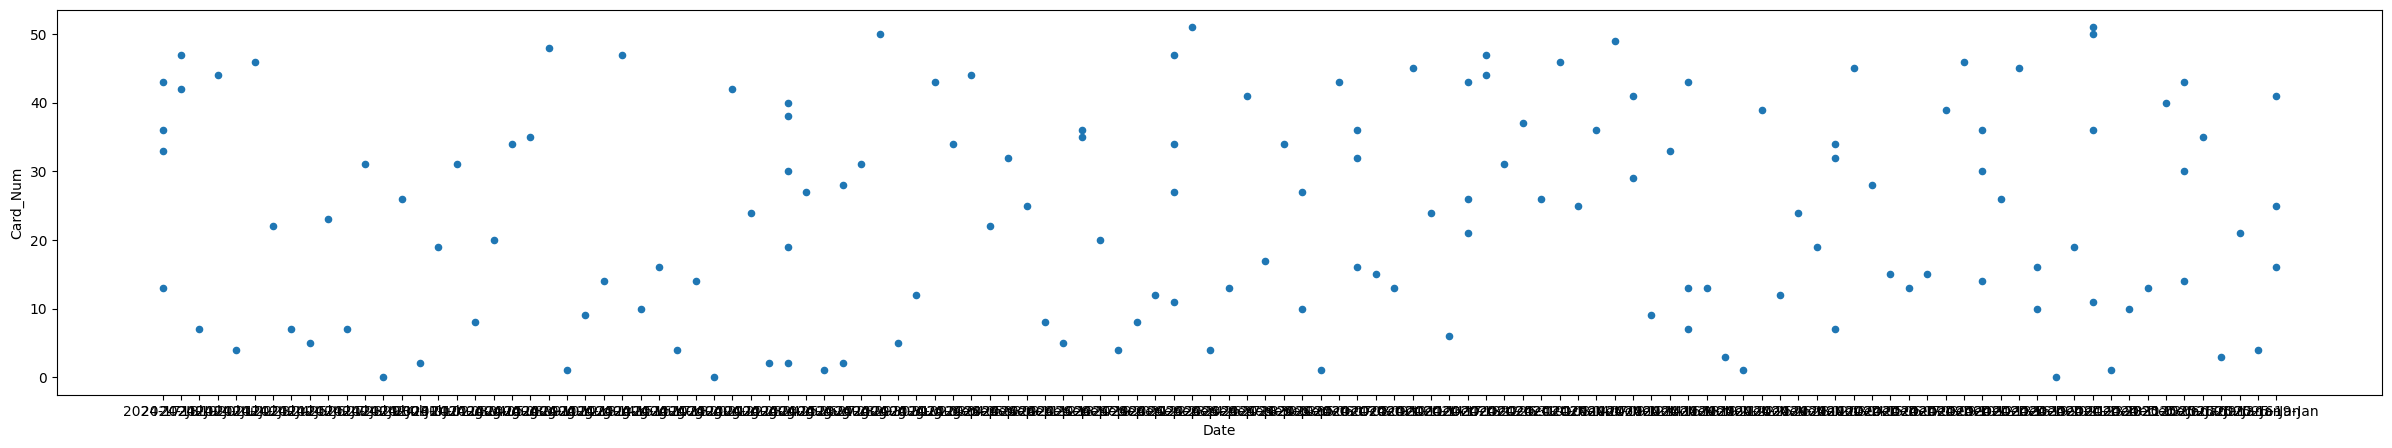

In [3]:
# graphing what cards I pulled when

pull_data.plot.scatter("Date", "Card_Num", figsize=(30,5))


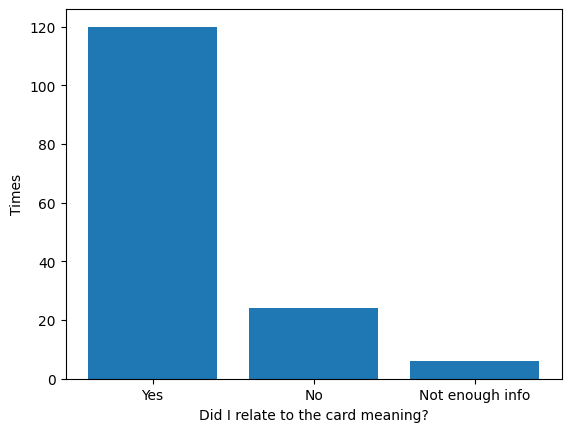

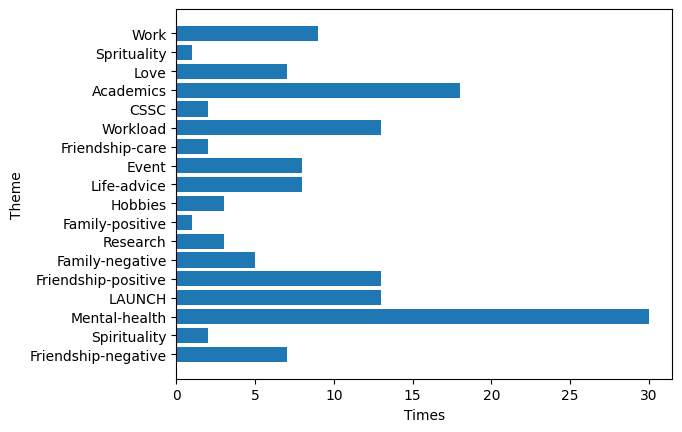

{'Friendship-negative': 7, 'Spirituality': 2, 'Mental-health': 30, 'LAUNCH': 13, 'Friendship-positive': 13, 'Family-negative': 5, 'Research': 3, 'Family-positive': 1, 'Hobbies': 3, 'Life-advice': 8, 'Event': 8, 'Friendship-care': 2, 'Workload': 13, 'CSSC': 2, 'Academics': 18, 'Love': 7, 'Sprituality': 1, 'Work': 9}
[['Friendship-negative' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '2' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0'
  '0' '0' '0' '1']
 ['Spirituality' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0']
 ['Mental-health' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '3'
  '2' '1' '0' '0' '0' '3' '2' '0' '0' '0' '0' '0' '0' '1' '0' '0' '2' '1'
  '0' '1' '2' '1' '1' '0' '0' '1' '1' '0' '0' '2' '0' '0' '0' '0

In [4]:
# graphing card relation

card_relation = np.bincount(pull_data["Connection"])

# data to be plotted
x = np.array(['Yes', 'No', 'Not enough info']) 
y = np.array([card_relation[1], card_relation[0], card_relation[2]])
 
# plotting
plt.bar(x,y) 
plt.xlabel("Did I relate to the card meaning?") 
plt.ylabel("Times") 
plt.show()

# reasons I related to card

card_relation = {}

for i in range(np.shape(pull_data)[0]):
    add1 = pull_data["Area_Connection_1"][i]
    add2 = pull_data["Area_Connection_2"][i]
    card_relation[add1] = card_relation.get(add1, 0) + 1
    card_relation[add2] = card_relation.get(add2, 0) + 1

card_relation.pop(np.nan)

# visualize reasons I relate to card

meaning_code = []
times_related = []

for k in card_relation.keys():
    meaning_code.append(k)
    times_related.append(card_relation[k])

plt.barh(meaning_code, times_related) 
plt.xlabel("Times") 
plt.ylabel("Theme") 
plt.show()

print(card_relation)

# now let's collect what cards connect to what themes
card_relation = [[0 for i in range(52)] for j in range(len(meaning_code))]
for j in range(len(meaning_code)):
    card_relation[j].insert(0, meaning_code[j])

for i in range(np.shape(pull_data)[0]):
    if pull_data["Connection"][i] == 0:
        continue

    add1 = pull_data["Area_Connection_1"][i]
    add2 = pull_data["Area_Connection_2"][i]

    for j in range(len(card_relation)):
        cur_relation = card_relation[j]
        if cur_relation[0] == add1:
            cur_relation[pull_data["Card_Num"][i] + 1] += 1
        if cur_relation[0] == add2:
            cur_relation[pull_data["Card_Num"][i] + 1] += 1

# print out this array nicely
print(np.matrix(card_relation))

In [7]:
#code for misleading data piece

card_relation = {}

for i in range(np.shape(pull_data)[0]):
    add1 = pull_data["Area_Connection_1"][i]
    add2 = pull_data["Area_Connection_2"][i]
    card_relation[add1] = card_relation.get(add1, 0) + 1
    card_relation[add2] = card_relation.get(add2, 0) + 1

card_relation.pop(np.nan)

# creating dataframe
meaning_code = []
times_related = []

for k in card_relation.keys():
    meaning_code.append(k)
    times_related.append(card_relation[k])
misleading_data = {"How I related to the Card Pull": meaning_code, "Frequency": times_related}
misleading_dataframe = pd.DataFrame(data=misleading_data)
# to make misleading: shift frequencies to make larger bubbles less common, and smaller bubbles more common
misleading_dataframe2 = pd.DataFrame(data=misleading_data)
misleading_dataframe["Frequency"] = (misleading_dataframe["Frequency"].max() + misleading_dataframe["Frequency"].min()) - misleading_dataframe["Frequency"]

print("MISLEADING")
print(misleading_dataframe)
print("NOT MISLEADING")
print(misleading_dataframe2)

MISLEADING
   How I related to the Card Pull  Frequency
0             Friendship-negative         24
1                    Spirituality         29
2                   Mental-health          1
3                          LAUNCH         18
4             Friendship-positive         18
5                 Family-negative         26
6                        Research         28
7                 Family-positive         30
8                         Hobbies         28
9                     Life-advice         23
10                          Event         23
11                Friendship-care         29
12                       Workload         18
13                           CSSC         29
14                      Academics         13
15                           Love         24
16                    Sprituality         30
17                           Work         22
NOT MISLEADING
   How I related to the Card Pull  Frequency
0             Friendship-negative          7
1                    Spiritua